In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
kangkung_data = pd.read_csv('/content/pertumbuhan kangkung sonic bloom (1).csv')

In [3]:
kangkung_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   no          960 non-null    int64  
 1   t_dangdut   960 non-null    float64
 2   t_jazz      960 non-null    float64
 3   t_murottal  0 non-null      float64
 4   t_nomusik   0 non-null      float64
 5   waktu       960 non-null    object 
 6   hari ke     960 non-null    object 
 7   hari real   960 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 60.1+ KB


In [4]:
kangkung_data.head()

,no,t_dangdut,t_jazz,t_murottal,t_nomusik,waktu,hari ke,hari real
0,1,6.0,5.0,NaN,NaN,7:00,ke-1,11
1,2,6.0,5.0,NaN,NaN,7:08,ke-1,11
2,3,6.0,5.0,NaN,NaN,7:16,ke-1,11
3,4,6.0,5.0,NaN,NaN,7:24,ke-1,11
4,5,6.0,5.0,NaN,NaN,7:32,ke-1,11


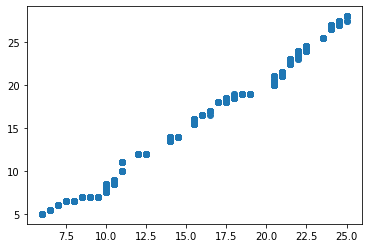

In [5]:
plt.scatter(kangkung_data['t_dangdut'],kangkung_data['t_jazz'])
plt.show()

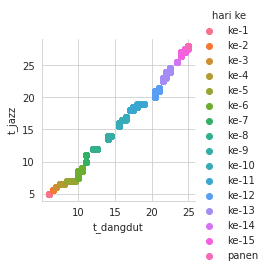

In [6]:
sns.set_style('whitegrid')
sns.FacetGrid(kangkung_data, hue = 'hari ke') \
    .map(plt.scatter, 't_dangdut','t_jazz') \
    .add_legend()

plt.show()

[Text(0.4396551724137931, 0.9166666666666666, 'X[1] <= 11.5\nentropy = 3.956\nsamples = 604\nvalue = [41, 35, 40, 41, 47, 40, 30, 40, 48, 40, 36, 33\n47, 35, 40, 11]'),
 Text(0.1896551724137931, 0.75, 'X[0] <= 7.25\nentropy = 2.796\nsamples = 285\nvalue = [41, 0, 0, 0, 0, 0, 0, 40, 48, 40, 36, 33, 47\n0, 0, 0]'),
 Text(0.10344827586206896, 0.5833333333333334, 'X[1] <= 5.75\nentropy = 1.58\nsamples = 129\nvalue = [41, 0, 0, 0, 0, 0, 0, 40, 48, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.06896551724137931, 0.4166666666666667, 'X[1] <= 5.25\nentropy = 1.0\nsamples = 81\nvalue = [41, 0, 0, 0, 0, 0, 0, 40, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.034482758620689655, 0.25, 'entropy = 0.0\nsamples = 41\nvalue = [41, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.10344827586206896, 0.25, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 0, 0, 0, 0, 0, 40, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.13793103448275862, 0.4166666666666667, 'entropy = 0.0\nsamples = 48\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 48, 0, 0, 0, 0, 0

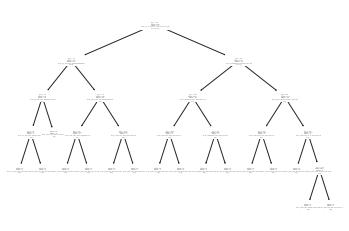

In [7]:
#Now try to create a model to solve our task
#As per our analysis, we can't find much information from new feature which can helpful in solving our problem...
#For solving our task I have selected few features amongs all to build up our best model..

'''Imporing few library for create Decision tree classifier and visualizing the tree structure'''

from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score


'''Here we separating independent varibles or target varibles from Iris dataset'''


X = kangkung_data[['t_dangdut','t_jazz']]
y = kangkung_data['hari ke']


#Before training the model we have split our data into Actual Train and Actual Test Dataset for training and validating purpose...

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


'''Now we have create a Decision tree classifier and trained it with training dataset.'''


kangkung_clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=2)
kangkung_clf.fit(Xt, Yt)

#Visualized the Tree which is formed on train dataset

tree.plot_tree(kangkung_clf)

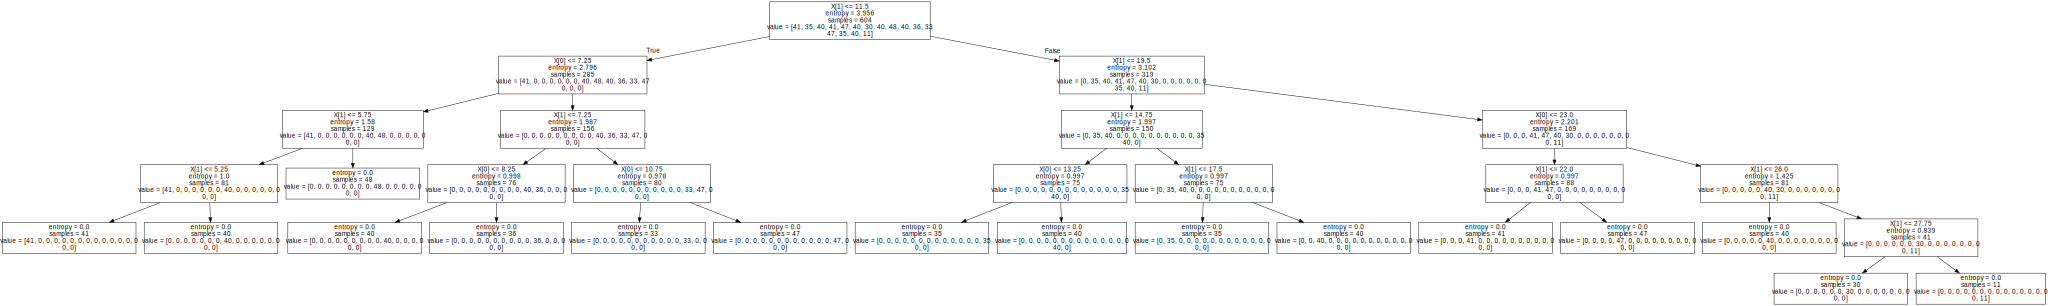

In [8]:
#Visualizing Decision Tree using graphviz library

dot_data = tree.export_graphviz(kangkung_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [9]:
# As our model has been trained....
#Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.

print('Accuracy score is:',cross_val_score(kangkung_clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 1.0


In [10]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = kangkung_clf.predict(Xcv)


print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 1.0


array([[[63,  0],
        [ 0,  5]],

       [[63,  0],
        [ 0,  5]],

       [[62,  0],
        [ 0,  6]],

       [[64,  0],
        [ 0,  4]],

       [[63,  0],
        [ 0,  5]],

       [[65,  0],
        [ 0,  3]],

       [[65,  0],
        [ 0,  3]],

       [[65,  0],
        [ 0,  3]],

       [[61,  0],
        [ 0,  7]],

       [[64,  0],
        [ 0,  4]],

       [[63,  0],
        [ 0,  5]],

       [[61,  0],
        [ 0,  7]],

       [[62,  0],
        [ 0,  6]],

       [[64,  0],
        [ 0,  4]],

       [[67,  0],
        [ 0,  1]]])

In [11]:
#Checking our model performance on actual unseen test data.. 
YT_hat = kangkung_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[270,   0],
        [  0,  18]],

       [[264,   0],
        [  0,  24]],

       [[270,   0],
        [  0,  18]],

       [[269,   0],
        [  0,  19]],

       [[276,   0],
        [  0,  12]],

       [[267,   0],
        [  0,  21]],

       [[273,   0],
        [  0,  15]],

       [[267,   0],
        [  0,  21]],

       [[279,   0],
        [  0,   9]],

       [[268,   0],
        [  0,  20]],

       [[265,   0],
        [  0,  23]],

       [[264,   0],
        [  0,  24]],

       [[277,   0],
        [  0,  11]],

       [[263,   0],
        [  0,  25]],

       [[265,   0],
        [  0,  23]],

       [[283,   0],
        [  0,   5]]])

[Text(0.3125, 0.9375, 'X[0] <= 7.25\ngini = 0.934\nsamples = 672\nvalue = [46, 40, 46, 45, 52, 43, 33, 43, 55, 44, 41, 40\n53, 39, 41, 11]'),
 Text(0.15, 0.8125, 'X[1] <= 5.75\ngini = 0.663\nsamples = 144\nvalue = [46, 0, 0, 0, 0, 0, 0, 43, 55, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.1, 0.6875, 'X[1] <= 5.25\ngini = 0.499\nsamples = 89\nvalue = [46, 0, 0, 0, 0, 0, 0, 43, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.05, 0.5625, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.15, 0.5625, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 0, 0, 0, 0, 0, 43, 0, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.2, 0.6875, 'gini = 0.0\nsamples = 55\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 55, 0, 0, 0, 0, 0\n0, 0]'),
 Text(0.475, 0.8125, 'X[1] <= 11.5\ngini = 0.918\nsamples = 528\nvalue = [0, 40, 46, 45, 52, 43, 33, 0, 0, 44, 41, 40\n53, 39, 41, 11]'),
 Text(0.3, 0.6875, 'X[0] <= 10.75\ngini = 0.747\nsamples = 178\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 44, 41, 40, 53, 0\n0, 0]'),
 Text(0.25, 0.5625

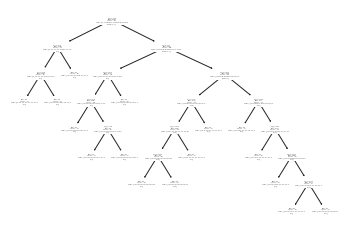

In [18]:
'''Training model on Actual train data... '''
kangkung_Fclf = DecisionTreeClassifier(criterion='gini',min_samples_split=2)
kangkung_Fclf.fit(Xtrain, Ytrain)

#Visualize tree structure..
tree.plot_tree(kangkung_Fclf)

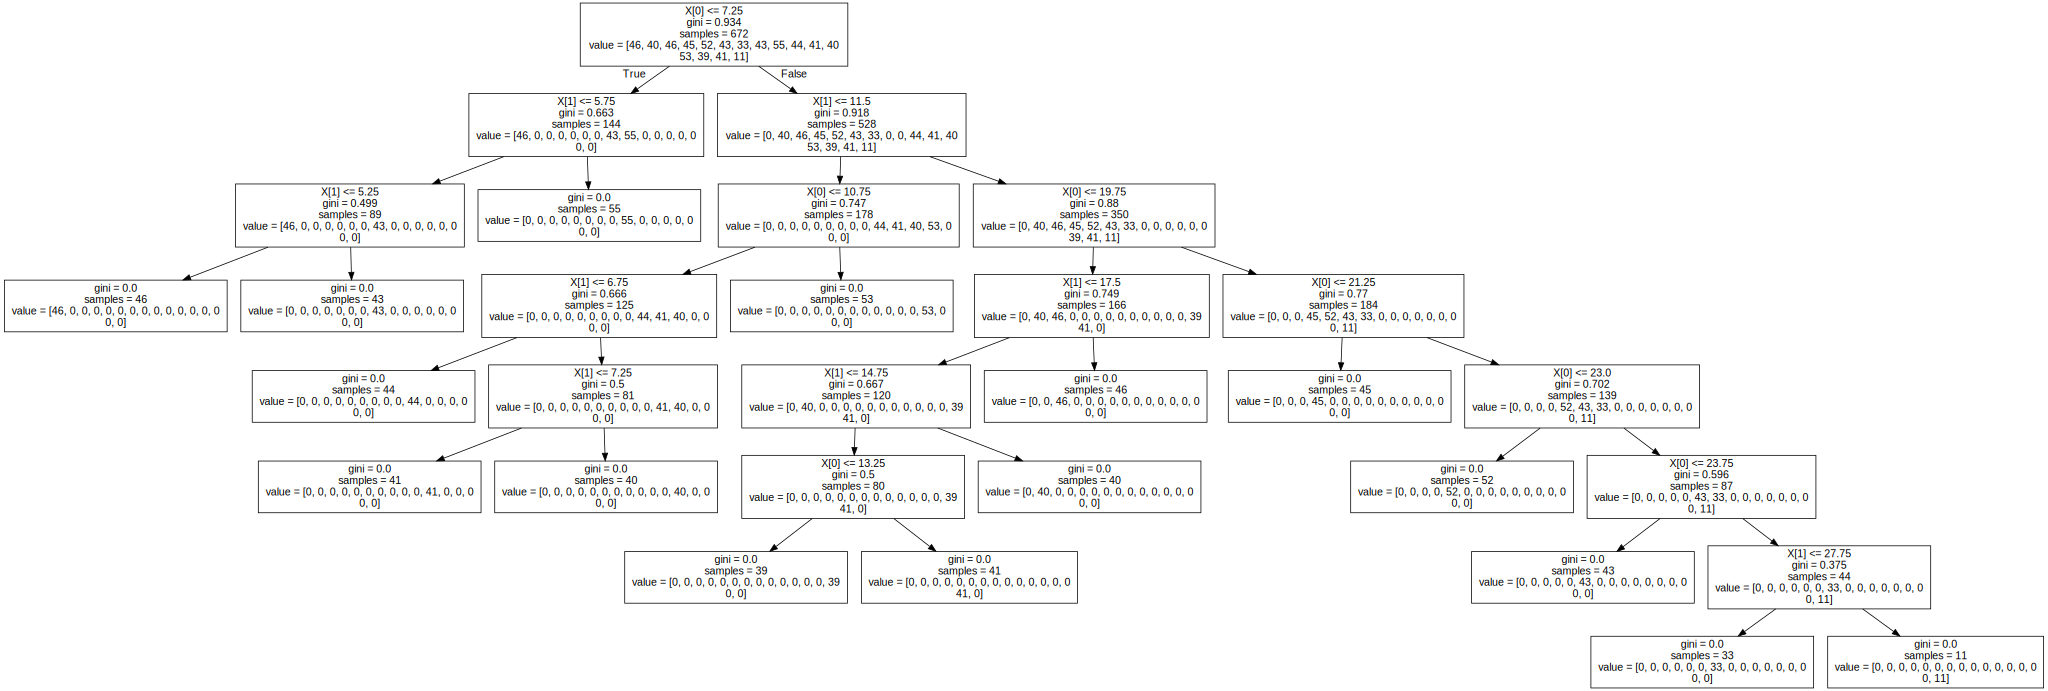

In [19]:
#Final Decision tree build for deploying in real world cases....

dot_data = tree.export_graphviz(kangkung_Fclf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [20]:
#Checking the performance of model on Actual Test data...

YT_Fhat = kangkung_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %


array([[[270,   0],
        [  0,  18]],

       [[264,   0],
        [  0,  24]],

       [[270,   0],
        [  0,  18]],

       [[269,   0],
        [  0,  19]],

       [[276,   0],
        [  0,  12]],

       [[267,   0],
        [  0,  21]],

       [[273,   0],
        [  0,  15]],

       [[267,   0],
        [  0,  21]],

       [[279,   0],
        [  0,   9]],

       [[268,   0],
        [  0,  20]],

       [[265,   0],
        [  0,  23]],

       [[264,   0],
        [  0,  24]],

       [[277,   0],
        [  0,  11]],

       [[263,   0],
        [  0,  25]],

       [[265,   0],
        [  0,  23]],

       [[283,   0],
        [  0,   5]]])

In [22]:
#Testing for New points except from Dataset

Test_point = [[5.6,6.0],
             [25.0,28.0]]

print(kangkung_Fclf.predict(Test_point))  

['ke-3' 'panen']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
